In [1]:
import pandas as pd
df=pd.read_csv("pdiabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
diabetes_count=df['Outcome'].value_counts()
print(diabetes_count)

Outcome
0    500
1    268
Name: count, dtype: int64


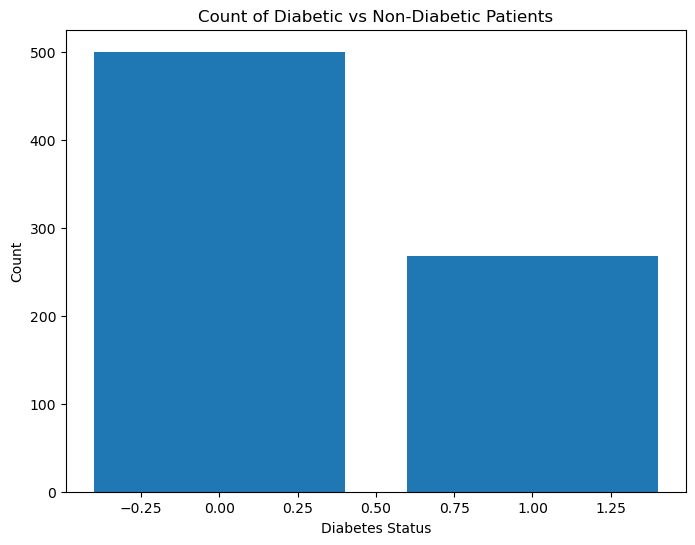

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

plt.bar(diabetes_count.index,diabetes_count.values) 
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Count of Diabetic vs Non-Diabetic Patients')
plt.show()


In [4]:
over_40_diabetes=df[(df['Age']>40)&(df['Outcome']== 1)]
print("Patients over 40 with diabetes:")
print(over_40_diabetes)


Patients over 40 with diabetes:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
13             1      189             60             23      846  30.1   
14             5      166             72             19      175  25.8   
..           ...      ...            ...            ...      ...   ...   
754            8      154             78             32        0  32.4   
757            0      123             72              0        0  36.3   
759            6      190             92              0        0  35.5   
761            9      170             74             31        0  44.0   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

model_without_scaling=LogisticRegression(max_iter=200)
model_without_scaling.fit(X_train,y_train)
from sklearn.metrics import accuracy_score


In [10]:
#Applying scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model with scaling
model_with_scaling=LogisticRegression(max_iter=200)
model_with_scaling.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=200)

In [13]:
y_pred_without_scaling=model_without_scaling.predict(X_test)
accuracy_without_scaling=accuracy_score(y_test, y_pred_without_scaling)
print(f"Accuracy without scaling:{accuracy_without_scaling*100:.2f}%")

#Accuracy with scaling
y_pred_with_scaling=model_with_scaling.predict(X_test_scaled)
accuracy_with_scaling=accuracy_score(y_test,y_pred_with_scaling)
print(f"Accuracy with scaling: {accuracy_with_scaling*100:.2f}%")


Accuracy without scaling:74.68%
Accuracy with scaling: 75.32%


In [18]:

sample1=X_test.iloc[0:1]  
sample2=X_test.iloc[1:2]  

sample1_scaled=scaler.transform(sample1)
sample2_scaled=scaler.transform(sample2)

prediction1=model_with_scaling.predict(sample1_scaled)
prediction2=model_without_scaling.predict(sample2)

print(f"Prediction for sample 1: {'Diabetic' if prediction1[0] == 1 else 'Non-Diabetic'}")
print(f"Prediction for sample 2: {'Diabetic' if prediction2[0] == 1 else 'Non-Diabetic'}")


Prediction for sample 1: Non-Diabetic
Prediction for sample 2: Non-Diabetic
